# Ridge and Lasso Regression Implementation

In [1]:
from sklearn.datasets import load_boston

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# In this data-set we need to predict the price of the house based on various feature.
df = load_boston()
df

# Here by default we are getting whole data, basically tells about the values based on number of features in the array format
# We have target, which is basically my price of the house

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

**Here first of all we will implement in Linear Regression and then Ridge and Lasso. Also, we will see MSE will reduce as 
  we use R and L resp.**

In [4]:
dataset = pd.DataFrame(df.data)
print(dataset.head())

# So we have around 13 independent features, and dependent am going to upload later.

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [5]:
# In order to know the feature names, So if you need to understand the features you can refer load_boston library
dataset.columns = df.feature_names
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df.target.shape

(506,)

In [7]:
# Now am going to create one more column Price in dataset, that have target values
dataset['Price'] = df.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
X = dataset.iloc[:,:-1] #independent features
y = dataset.iloc[:,-1]  #dependent feature

## Linear Regression

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression()
mse = cross_val_score(lin_regressor, X, y, scoring = "neg_mean_squared_error", cv = 5)
mean_mse = np.mean(mse)
print(mean_mse)    # The more it is near to zero, the more model is going to give accurate result, but it can also 
                   # lead to overfitting

-37.13180746769914


## Ridge Regression

In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()  # Intializing Ridge Object
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring="neg_mean_squared_error", cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In Ridge Regression, we need to find out value lambda, which is also find out through Cross-Validation. For that we gonna use
GridSearchCV. Here parameter "alpha" is required inside ridge, for that we will provide various value of alpha's(>0), any finite
number. After applying GridSearchCV, it will tell us which value of alpha is going to suite for this problem statement.

In [11]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.9057019475404


In [12]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()  # Intializing Ridge Object
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring="neg_mean_squared_error", cv=5)
lasso_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [13]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-35.531580220694856


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)

In [16]:
prediction_lasso

array([23.74549008, 25.05669894, 27.30699681, 15.26474466, 20.28388223,
       22.75172373, 21.45598059, 24.23856649, 21.11819135, 19.95909495,
        8.98313974, 13.30218316, 17.99925624,  8.39272295, 35.35448484,
       30.78862119, 22.38396018, 34.3159854 , 29.8521009 , 24.63915134,
       25.7851669 , 25.20997813, 20.07312698, 29.34704456, 23.54801802,
       17.49320154, 19.76581421, 22.02254005, 31.35043449, 19.53061141,
       17.86731915, 20.03959005, 22.70589322, 24.27507125, 28.3321545 ,
       20.26286175, 10.68729818, 24.94704305, 15.84336797, 12.8254677 ,
       25.41186454, 20.63647768, 22.05355817, 16.77749717, 23.30629191,
       25.77681736, 19.84379805, 23.32853181, 12.22570134, 23.7054699 ,
       21.09270778, 16.76593695, 24.7895207 , 27.77843148, 15.02615536,
       21.29343807, 21.55732101, 17.59916216, 18.35971801, 19.53427781,
       21.69584327, 22.09466825, 30.77701755, 30.58126341, 18.59617266,
       31.00696923, 18.55257582, 18.71479862, 15.79040727, 22.86

In [17]:
prediction_ridge

array([23.96675946, 24.98996014, 27.5915891 , 14.26059397, 19.63842944,
       21.33417836, 21.32039718, 23.27239931, 20.30837677, 19.48226179,
        6.4578138 , 14.28838187, 18.59820449,  7.32675586, 36.99591747,
       31.36360797, 22.27052891, 35.16096521, 30.99397818, 24.25137539,
       25.40646048, 24.34913685, 20.21632652, 30.0992825 , 22.68378433,
       13.94885033, 18.64684143, 21.48729544, 33.26170271, 19.79217513,
       18.17155893, 19.9695722 , 20.42970393, 23.50528313, 28.90147149,
       20.77821424, 11.23603614, 25.21197341, 16.33605596, 13.74459083,
       24.96162953, 20.32082943, 21.56714797, 16.00431973, 22.631114  ,
       24.95003631, 18.4770964 , 24.0302334 , 12.20742324, 24.00507962,
       21.73290773, 17.56687132, 24.74921266, 28.65328508, 13.58721717,
       21.3260628 , 20.50282091, 15.43442841, 15.56550274, 19.58519135,
       18.94927305, 21.87657392, 31.86147714, 31.60936099, 18.30851646,
       31.83190056, 19.49024654, 18.37266891, 17.08246064, 22.88

<AxesSubplot:>

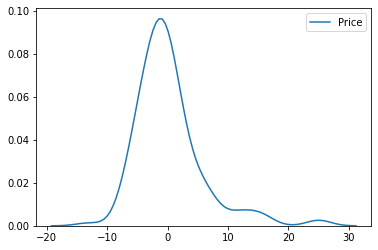

In [28]:
import seaborn as sns
#from scipy.stats import norm

#sns.distplot(y_test-prediction_ridge, fit=norm)
sns.kdeplot(y_test-prediction_lasso)

<AxesSubplot:>

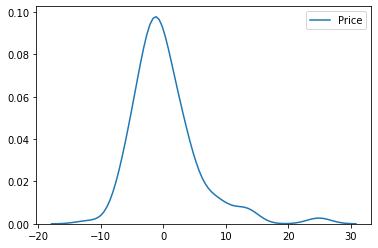

In [26]:
sns.kdeplot(y_test-prediction_ridge)

It Observed that rigde graph is more stable, that why it has good accuracy or as Generalized model.